In [1]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.max_columns = 50
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

In [2]:
data = pd.read_csv('prepared_baseball_data.csv')

## Explore the Data

In [3]:
data.head(2)

,Season,Name,Team,G,Age,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,EV,BsR,Off,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%,GB/FB,LD%,GB%,HR/FB,playerid,HR_rate,R_rate,RBI_rate,SB_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val
0,2017,Mike Trout,Angels,114,25,507,33,92,72,22,0.185,0.178,0.323,0.318,0.306,0.442,0.629,0.437,180,88.8,4.0,54.4,0.197,0.615,0.681,0.901,0.82,0.184,0.367,0.232,10155,0.289474,0.807018,0.631579,0.192982,2.061054,2.497973,0.957319,1.866089,1.364350,8.746785,8.953784
1,2017,J.D. Martinez,- - -,119,29,489,45,85,104,4,0.108,0.262,0.387,0.327,0.303,0.376,0.690,0.430,167,90.9,-5.8,35.3,0.321,0.764,0.541,0.805,0.89,0.185,0.383,0.338,6184,0.378151,0.714286,0.873950,0.033613,3.387659,1.682132,2.818576,-0.372138,1.260631,8.776860,10.084667


In [4]:
data.describe()

,Season,G,Age,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,EV,BsR,Off,O-Swing%,Z-Swing%,O-Contact%,Z-Contact%,GB/FB,LD%,GB%,HR/FB,playerid,HR_rate,R_rate,RBI_rate,SB_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,449.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.00000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,2013.550260,141.068458,28.214038,579.262565,18.353553,72.337955,69.570191,10.006932,0.085828,0.183038,0.170980,0.307451,0.271214,0.338454,0.442179,0.337785,111.353553,88.689532,0.228163,8.568024,0.301638,0.665718,0.675543,0.878173,1.30279,0.206412,0.435131,0.122771,6137.699307,0.129186,0.510617,0.490342,0.070484,0.106325,0.175683,0.127233,0.043953,0.127756,0.580950,0.260431
std,2.314325,16.168980,3.662962,86.555025,9.940838,18.773729,22.253659,11.004136,0.030436,0.056472,0.055039,0.032555,0.027323,0.032595,0.064192,0.033987,23.063804,2.083910,3.945887,16.564309,0.055111,0.060580,0.088121,0.047097,0.50797,0.029168,0.064962,0.059330,3922.249952,0.066243,0.109458,0.136274,0.077018,1.014324,0.979923,1.005649,1.013864,0.970153,3.073591,3.243115
min,2010.000000,93.000000,19.000000,400.000000,0.000000,26.000000,17.000000,0.000000,0.021000,0.058000,0.036000,0.196000,0.159000,0.252000,0.277000,0.247000,49.000000,80.500000,-12.600000,-34.000000,0.158000,0.448000,0.417000,0.695000,0.48000,0.106000,0.263000,0.000000,97.000000,0.000000,0.202703,0.116438,0.000000,-2.080068,-2.711601,-2.742317,-0.978881,-3.887086,-7.881853,-7.881853
25%,2012.000000,130.000000,26.000000,511.000000,11.000000,58.000000,52.000000,2.000000,0.063000,0.142000,0.130000,0.286000,0.253000,0.315000,0.397250,0.315000,96.000000,87.300000,-2.400000,-2.350000,0.261000,0.624250,0.612250,0.848000,0.97000,0.186000,0.389000,0.078250,3057.000000,0.076923,0.432432,0.390209,0.015297,-0.692392,-0.529614,-0.629631,-0.667362,-0.535804,-1.691809,-2.168150
50%,2014.000000,145.000000,28.000000,587.500000,17.000000,71.500000,68.000000,6.000000,0.083000,0.179000,0.169000,0.308000,0.271000,0.336000,0.439000,0.335000,110.000000,88.700000,0.200000,7.000000,0.298500,0.666000,0.676000,0.884000,1.19000,0.206000,0.432500,0.119000,5352.000000,0.126582,0.504819,0.486696,0.043910,0.062385,0.141844,0.120294,-0.298715,0.133656,0.413503,0.045613
75%,2016.000000,155.000000,31.000000,652.000000,25.000000,85.000000,85.000000,14.000000,0.105000,0.219000,0.209000,0.330000,0.289000,0.359000,0.482000,0.358000,125.750000,90.000000,2.700000,17.675000,0.338750,0.707000,0.739000,0.912000,1.50000,0.225000,0.476000,0.162000,9219.000000,0.175118,0.583333,0.583722,0.103104,0.822267,0.810970,0.808571,0.457275,0.772286,2.541982,2.436074
max,2017.000000,162.000000,40.000000,754.000000,59.000000,137.000000,139.000000,68.000000,0.206000,0.372000,0.387000,0.404000,0.359000,0.474000,0.690000,0.461000,197.000000,94.900000,14.300000,77.700000,0.479000,0.857000,0.908000,0.980000,5.91000,0.310000,0.685000,0.356000,19198.000000,0.378151,0.928058,0.925676,0.500000,3.665980,3.964376,3.489644,6.202451,3.459139,11.551089,12.516023


In [5]:
data.columns

Index(['Season', 'Name', 'Team', 'G', 'Age', 'PA', 'HR', 'R', 'RBI', 'SB',
       'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'EV',
       'BsR', 'Off', 'O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%',
       'GB/FB', 'LD%', 'GB%', 'HR/FB', 'playerid', 'HR_rate', 'R_rate',
       'RBI_rate', 'SB_rate', 'HR_rate_std', 'R_rate_std', 'RBI_rate_std',
       'SB_rate_std', 'AVG_std', 'f_val_std', 'ny_f_val'],
      dtype='object')

## Create data structures for use in models

In [6]:
# define columns that won't be used in predictive modeling
drop_cols = ['Name', 'Team', 'HR', 'R', 'RBI', 'SB','HR_rate_std', 'R_rate_std', 
             'RBI_rate_std','SB_rate_std', 'AVG_std', 'f_val_std']

# create DataFrame for use in data visualization
data2 = data.drop(drop_cols, axis=1)

In [7]:
# drop column EV due to missing entries (shows in in-depth data exploration notebook)
data2 = data2.drop('EV', axis=1)

In [8]:
# dropping columns using methodology from in-depth data exploration notebook
drop_cols2 = ['G', 'Age', 'BB%', 'K%', 'BABIP', 'BsR', 'O-Swing%', 
           'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'GB/FB', 'LD%', 
           'GB%', 'SB_rate', 'ISO', 'OBP', 'wOBA', 'wRC+', 'SLG', 'HR/FB']

data3 = data2.drop(drop_cols2, axis=1)

In [9]:
# test on 2 most recent years of data (index 300 is cut off)
# used for all models except Elastic Net
df_train = data3[300:]
df_test = data3[:300]

# use to retain more features for Elastic Net
df_train_enet = data2[300:]
df_test_enet = data2[:300]

In [10]:
# remove target from X
X_train = df_train.drop('ny_f_val', axis=1)
X_test = df_test.drop('ny_f_val', axis=1)

# use for Elastic Net
X_train_enet = df_train_enet.drop('ny_f_val', axis=1)
X_test_enet = df_test_enet.drop('ny_f_val', axis=1)

# create target y
y_train = df_train['ny_f_val']
y_test = df_test['ny_f_val']

In [11]:
# hold onto season column
train_season = X_train['Season']
test_season = X_test['Season']

#hold onto playerid column
train_ID = X_train['playerid']
test_ID = X_test['playerid']

#Now drop the  'playerid' and 'Season' columns since they are unnecessary for the prediction process
X_train.drop(["playerid", "Season"], axis=1, inplace = True)
X_test.drop(["playerid", "Season"], axis=1, inplace = True)
X_train_enet.drop(["playerid", "Season"], axis=1, inplace = True)
X_test_enet.drop(["playerid", "Season"], axis=1, inplace = True)

In [12]:
X_train.head(1)

,PA,AVG,Off,HR_rate,R_rate,RBI_rate
300,654,0.33,77.7,0.27451,0.771242,0.647059


In [13]:
y_train.head()

300    1.803493
301    4.763963
302    5.482066
303    7.607345
304    4.595530
Name: ny_f_val, dtype: float64

### Scale the data

In [14]:
# retain column names before changing data structure
X_train_cols = X_train.columns
X_train_enet_cols = X_train_enet.columns

# Create normalized inputs for LinearRegression, XGBoost, and LGBoost
norm_scaler = MinMaxScaler()
X_train_normal = norm_scaler.fit_transform(X_train)
X_test_normal = norm_scaler.transform(X_test)

# create standardized inputs for ENet
stand_scaler = StandardScaler()
X_train_standard = stand_scaler.fit_transform(X_train_enet)
X_test_standard = stand_scaler.transform(X_test_enet)

## Modeling

#### Baseline Model

In [15]:
lin_model = LinearRegression()

lin_model.fit(X_train_normal, y_train)
lin_preds = lin_model.predict(X_test_normal)

lin_resids = (y_test - lin_preds)

lin_MSE = mean_squared_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)

print('Lin MSE:', lin_MSE)
print('R2:', lin_r2)

Lin MSE: 8.635735709936744
R2: 0.23771603677002073


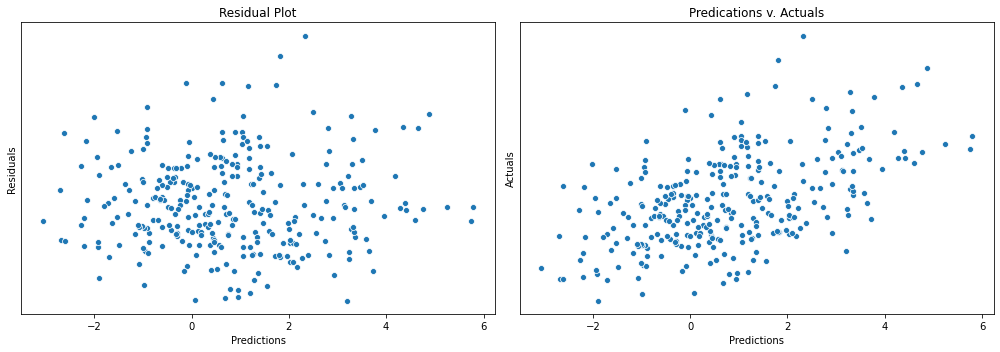

In [16]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lin_preds, y=lin_resids, ax=axes[0])
axes[0].set_title('Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lin_preds, y=y_test, ax=axes[1])
axes[1].set_title('Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

In [17]:
# # can use to see coefficients of features
# lin_coef_dict = {}
# for coef, feat in zip(lin_model.coef_,X_train_cols):
#     lin_coef_dict[feat] = coef
# lin_coef_dict

#### Random Forest Model

In [18]:
#run once to find optimal params (takes awhile)
rf_model = RandomForestRegressor(random_state=35, criterion='mse')

params = {
        'n_estimators': range(135,150,1),
        'min_samples_split': range(6,15,1),
        'max_depth': [2, 3, 4]
        }

# use GridSearchCV for finding optimal hyperparams
search_rf = GridSearchCV(estimator=rf_model, param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

search_rf.fit(X_train, y_train)
search_rf.best_params_

{'max_depth': 3, 'min_samples_split': 14, 'n_estimators': 144}

In [19]:
rf_model = search_rf.best_estimator_
rf_model.fit(X_train_normal, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=14, n_estimators=144,
                      random_state=35)

In [20]:
rf_preds = rf_model.predict(X_test_normal)

rf_resids = (y_test - rf_preds)

rf_MSE = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print('MSE:', rf_MSE)
print('R2:', rf_r2)

MSE: 8.645913194815623
R2: 0.23681766125578874


#### XGB Model

In [21]:
#run once to find optimal params (takes awhile)
xgb_reg = XGBRegressor(learning_rate=0.05, random_state=35, objective='reg:squarederror')

params = {
        'n_estimators': [25, 50, 100],
        'min_child_weight': [5, 10, 15],
        'gamma': [1.5, 2, 5],
        'subsample': [0.4, 0.6],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }

# use GridSearchCV for finding optimal hyperparams
search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

search_xgb.fit(X_train, y_train)
search_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 3,
 'min_child_weight': 15,
 'n_estimators': 50,
 'subsample': 0.4}

In [22]:
xgb_reg = search_xgb.best_estimator_
xgb_reg.fit(X_train_normal, y_train)

XGBRegressor(colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
             min_child_weight=15, n_estimators=50, objective='reg:squarederror',
             random_state=35, subsample=0.4)

In [23]:
xgb_preds = xgb_reg.predict(X_test_normal)

xgb_resids = (y_test - xgb_preds)

xgb_MSE = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print('MSE:', xgb_MSE)
print('R2:', xgb_r2)

MSE: 8.738069845635938
R2: 0.22868291288171838


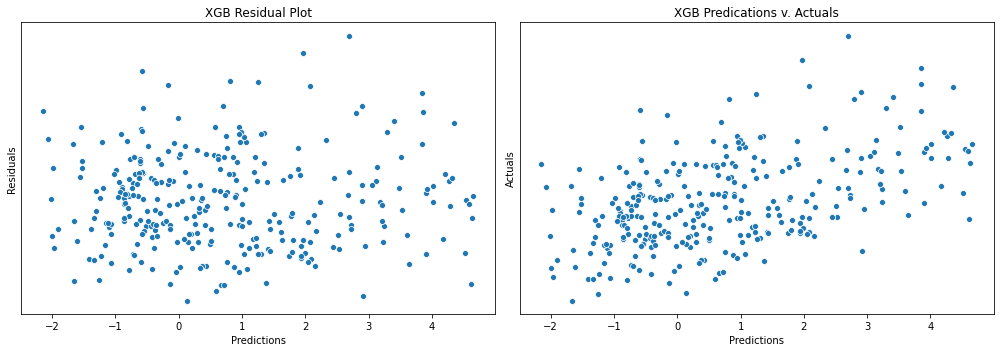

In [24]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=xgb_preds, y=xgb_resids, ax=axes[0])
axes[0].set_title('XGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=xgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('XGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Elastic Net Model

In [25]:
# use standardized inputs for ENet

# use GridSearchCV for finding optimal hyperparams
search = GridSearchCV(ElasticNet(max_iter=5000, random_state=35, tol=0.1), param_grid={'alpha':np.logspace(-5, 2, 8), 'l1_ratio':[.2, .4, .6, .8,]},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10, verbose=1)

In [26]:
search.fit(X_train_standard, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2507.378779853964, tolerance: 778.0042799883331
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2504.1260177749873, tolerance: 778.945922588647
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2506.347625065408, tolerance: 795.3832952978
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective di

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2364.9491835671565, tolerance: 778.945922588647
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2391.9367897493694, tolerance: 795.3832952978
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2410.513853306084, tolerance: 785.0214570311055
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999.3748660573726, tolerance: 785.0214570311055
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1717.2815050601862, tolerance: 795.8614203297293
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1698.257196354951, tolerance: 776.1480174054766
  positive)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

GridSearchCV(cv=10,
             estimator=ElasticNet(max_iter=5000, random_state=35, tol=0.1),
             n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
enet_model = search.best_estimator_

# use best enet model and save predictions
enet_preds=enet_model.predict(X_test_standard)

enet_resids = (y_test - enet_preds)

enet_MSE = mean_squared_error(y_test, enet_preds)
enet_r2 = r2_score(y_test, enet_preds)
print('ENet MSE:', enet_MSE)
print('ENet R2:', enet_r2)

ENet MSE: 8.0590602996011
ENet R2: 0.2886196808894341


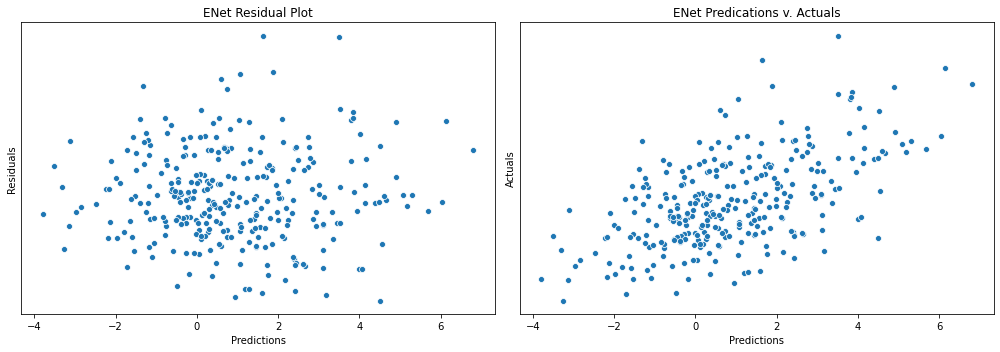

In [28]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=enet_preds, y=enet_resids, ax=axes[0])
axes[0].set_title('ENet Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=enet_preds, y=y_test, ax=axes[1])
axes[1].set_title('ENet Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### LightGB Model

In [29]:
# Tune hyperparamters using Bayesian Hyperparamter Optimization
def bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=30, n_folds=5, random_seed=6, 
                            n_estimators=1000, learning_rate=0.05, output_process=False):
  
  train_data = lgb.Dataset(data=X, label=y)

  def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth,
               lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    
    params = {
        'objective':'regression',
        'learning_rate':learning_rate, 
        'metric':'rmse'
        }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight

    cv_result = lgb.cv(params, train_data, num_boost_round=1000, nfold=3, seed=random_seed,
                           stratified=False, verbose_eval =200, metrics=['rmse'])

    return min(cv_result['rmse-mean'])

    # setting range of the parameters
  lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                          'feature_fraction': (0.1, 0.9),
                                          'bagging_fraction': (0.5, 1),
                                          'max_depth': (5, 8.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_split_gain': (0.001, 0.1),
                                          'min_child_weight': (5, 25)}, random_state=0)
  # optimize
  lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
  # output optimization process
  if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
  # return
  return lgbBO

In [30]:
opt_params = bayes_parameter_opt_lgb(X_train_normal, y_train, init_round=5, opt_round=10, n_folds=5, random_seed=35)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
[200]	cv_agg's rmse: 2.93074 + 0.0802895
[400]	cv_agg's rmse: 3.02846 + 0.0899403
[600]	cv_agg's rmse: 3.06097 + 0.0771375
[800]	cv_agg's rmse: 3.06097 + 0.0771375
[1000]	cv_agg's rmse: 3.06097 + 0.0771375
|  1        |  2.787    |  0.7744   |  0.6722   |  3.014    |  1.635    |  6.69     |  17.92    |  0.04432  |  42.73    |
[200]	cv_agg's rmse: 2.89761 + 0.0672103
[400]	cv_agg's rmse: 3.00156 + 0.082962
[600]	cv_agg's rmse: 3.06213 + 0.0828144
[800]	cv_agg's rmse: 3.10346 + 0.0877769
[1000]	cv_agg's rmse: 3.11399 + 0.0901602
|  2        |  2.772    |  0.9818   |  0.4068   |  3.959    |  1.587    |  7.266    |  23.51    |  0.008033 |  25.83    |
[200]	cv_agg's rmse: 2.96684 + 0.0558642
[400]	cv_agg's rmse: 3.04608 + 0.0524843
[600]	cv_agg's rmse

In [31]:
params = opt_params.max['params']
params

{'bagging_fraction': 0.792985541295224,
 'feature_fraction': 0.844599030102194,
 'lambda_l1': 2.612234679028655,
 'lambda_l2': 0.9115473014290368,
 'max_depth': 8.531225140880148,
 'min_child_weight': 8.941838114004382,
 'min_split_gain': 0.06858011911695182,
 'num_leaves': 31.818471309092757}

In [32]:
# set params for model based on optimal params
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "bagging_frequency" : 5,
    "bagging_seed" : 2018,
    "verbosity" : -1,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'lambda_l1': 3.5,
    'lambda_l2': 2.2,
    'max_depth': 8,
    'min_child_weight': 19,
    'min_split_gain': 0.0,
    'num_leaves': 31

}

In [33]:
lgb_model = lgb.LGBMRegressor(**params)

In [34]:
lgb_model.fit(X_train_normal, y_train)
lgb_preds = lgb_model.predict(X_test_normal)

lgb_resids = (y_test - lgb_preds)

lgb_MSE = mean_squared_error(y_test, lgb_preds)
lgb_r2 = r2_score(y_test, lgb_preds)
print('LGB MSE:', lgb_MSE)
print('LGB R2:', lgb_r2)

LGB MSE: 9.950689032114909
LGB R2: 0.12164395402447992


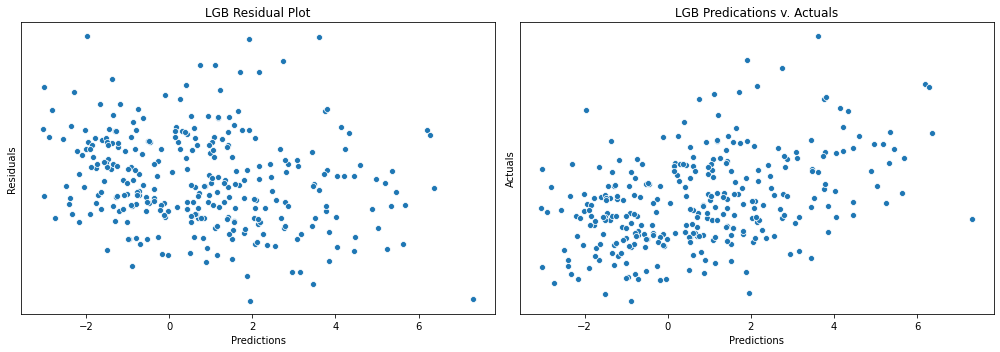

In [35]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lgb_preds, y=lgb_resids, ax=axes[0])
axes[0].set_title('LGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('LGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### SVM Model

In [36]:
# use GridSearchCV for finding optimal hyperparams
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}

svm_search = GridSearchCV(SVR(), param_grid=svm_params,verbose=3,
                      scoring='neg_mean_squared_error',n_jobs=1,cv=5)

svm_search.fit(X_train_normal, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-7.694, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-7.663, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-7.892, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-7.151, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ...... C=0.1, gamma=1, kernel=linear, score=-8.658, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-7.595, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-8.733, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-9.002, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-8.151, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-9.979, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-7.694, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-7.663, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ... C=0.1, gamma=0.01, kernel=linear, score=-7.892, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=linear, score=-7.610, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .... C=1, gamma=0.001, kernel=linear, score=-7.730, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .... C=1, gamma=0.001, kernel=linear, score=-7.178, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .... C=1, gamma=0.001, kernel=linear, score=-8.556, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ...... C=1, gamma=0.001, kernel=rbf, score=-10.978, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-9.613, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-9.914, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ..... C=10, gamma=0.0001, kernel=rbf, score=-8.962, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .... C=10, gamma=0.0001, kernel=rbf, score=-11.080, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-7.232, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-7.667, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-7.751, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-7.360, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ...... C=100, gamma=1, kernel=linear, score=-8.664, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=3)

In [37]:
svm_model = svm_search.best_estimator_

svm_preds = svm_model.predict(X_test_normal)

svm_resids = (y_test - svm_preds)

svm_MSE = mean_squared_error(y_test, svm_preds)
svm_r2 = r2_score(y_test, svm_preds)
print('SVM MSE:', svm_MSE)
print('SVM R2:', svm_r2)

SVM MSE: 8.712807259326537
SVM R2: 0.23091286352636475


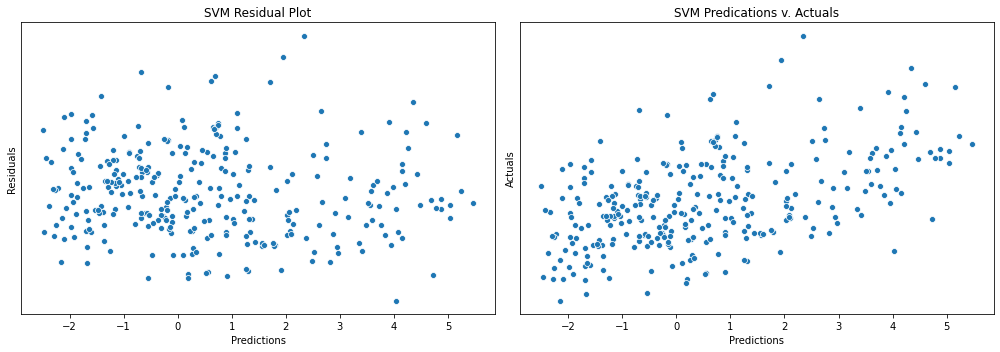

In [38]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=svm_preds, y=svm_resids, ax=axes[0])
axes[0].set_title('SVM Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=svm_preds, y=y_test, ax=axes[1])
axes[1].set_title('SVM Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

## Model Performance Comparison

In [39]:
print('Lin MSE:', round(lin_MSE,3))
print('RF MSE:', round(rf_MSE,3))
print('XGB MSE:', round(xgb_MSE, 3))
print('ENet MSE:', round(enet_MSE, 3))
print('LGB MSE:', round(lgb_MSE,3))
print('SVM MSE:', round(svm_MSE,3))

Lin MSE: 8.636
RF MSE: 8.646
XGB MSE: 8.738
ENet MSE: 8.059
LGB MSE: 9.951
SVM MSE: 8.713


Best model is Elastic Net. Use this model and its predictions for further analysis.

## Compare Versus ADP

In this section, I will be comparing the results of the Elastic Net model against the pre-season rankings as determined by ADP. The two ranking systems will be compared by placing each player into a group _x_ out of *n* groups based on their Predicted FV or ADP, whichever is applicable. The same will be done for Target FV. The groups will then be compared and scored accordingly:

First, the number of correct predictions of players in the top 50% will be calculated:

In [40]:
scoring = pd.DataFrame(data=[['Matches Placement','+1'], ['Does Not Match', '0']], columns=['Result', 'Score'], index=None)
scoring.style.hide_index()

Result,Score
Matches Placement,+1
Does Not Match,0


Then the ratio of correct predictions versus the total number of the top 50% of players will be calculated:

$$\text{Top Performer Ratio (TPR) = $\frac{\text{Correct Predictions}}{\text{Top Half of Players}}$}$$

#### Other Evaluation Metrics

- <b>Missed Predictions</b>: The number of predictions that were incorrectly placed inside/outside of the top 50%
- <b>Missed Target Value</b>: The total Target Value of the players that were incorrectly predicted outside of the top 50% 
- <b>Value Found</b>: The total Target Value of players that were correctly predicted inside the top 50%
- <b>Total Value</b>: Value Found - Missed Target Value

#### Read in ADP Data

In [74]:
ADP_data = pd.read_csv('../datasets/baseball/ADP_2018.csv')

In [75]:
ADP_data.head()

,RK,ID,NAME,ADP,New Rank
0,1,10000600,Mike Trout,1,1
1,2,10000485,Jose Altuve,2,2
2,3,10000393,Nolan Arenado,3,3
3,4,10002094,Trea Turner,4,4
4,5,10000031,Paul Goldschmidt,5,5


In [76]:
ADP_data.drop(['RK', 'ID'], inplace=True, axis=1)
ADP_data.rename(columns={"NAME": "Name"}, inplace=True)

#### Create useful functions

Below I will define 2 functions for separating the model predictions and ADP predictions into subgroups. I will also create a function to identify "missed" predictions along with some alternative scoring metrics (explained later). 

In [77]:
def add_sections(df, sections=4):
    num_players = len(df)

    counter = 0
    df.sort_values('Target FV', ascending=False, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'Target Section'] = int(n+1)
                last_i = i
        counter = last_i+1

    counter = 0
    df.sort_values('Predicted FV', ascending=False, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'Predicted Section'] = int(n+1)
                last_i = i
        counter = last_i+1

    return df

In [78]:
def ADP_add_sections(df, sections=4):
    num_players = len(df)
    counter = 0
    df.sort_values('New Rank', ascending=True, inplace=True, ignore_index=True)
    for n in range(sections):
        for i in range(counter, num_players):
            if i < math.floor(num_players*((n+1)/sections)):
                df.at[i, 'ADP Section'] = (n+1)
                last_i = i
        counter = last_i+1
    return df

In [79]:
def prediction_results(df, sections=4):
    split = sections//2
    temp1 = df[(df['Target Section'] <=split) & (df['Predicted Section'] >split)] #predicted bad, does good
    temp2 = df[(df['Target Section'] >split) & (df['Predicted Section'] <=split)] #predicted good, does bad
    temp3 = df[(df['Target Section'] <=split) & (df['Predicted Section'] <=split)] #predicted good, does good
    temp4 = df[(df['Target Section'] <=split)] # did good
    global model_missed_predictions, model_missed_tv, model_top_ratio, model_value_found, model_total_value  
    model_missed_predictions = pd.concat([temp1, temp2])
    model_missed_tv = abs(model_missed_predictions['Target FV']).sum()
    model_top_ratio = len(temp3)/len(temp4)
    model_value_found =  abs(temp3['Target FV']).sum()
    model_total_value = model_value_found-model_missed_tv
    model_correct_predictions = len(df)-len(model_missed_predictions)
    print("Top Performer Ratio Predicted:", model_top_ratio)
    print("Number of missed predictions:", len(model_missed_predictions))
    print("Target Value Missed:", model_missed_tv)
    print("Value found:", model_value_found)
    print("Total value:", model_total_value)

#### Configure Elastic Net results

In [80]:
names = data[['playerid', 'Name']].drop_duplicates(subset=['playerid'])

In [81]:
col_names = ['playerid', 'Target Season', 'Target FV', 
             'Predicted FV', 'Difference']
             
enet_output = pd.DataFrame({'playerid': test_ID,
                            'Target Season': test_season+1,
                            'Target FV': y_test, 
                            'Predicted FV': enet_preds, 
                            'Difference': (y_test - enet_preds)}, 
                           columns=col_names)

enet_output = pd.merge(names,enet_output,on='playerid',how='inner')
enet_output.head()

,playerid,Name,Target Season,Target FV,Predicted FV,Difference
0,10155,Mike Trout,2018,8.953784,6.811213,2.142572
1,10155,Mike Trout,2017,8.746785,4.898371,3.848414
2,6184,J.D. Martinez,2018,10.084667,6.140453,3.944214
3,6184,J.D. Martinez,2017,8.776860,1.878603,6.898257
4,15640,Aaron Judge,2018,5.069503,6.034426,-0.964923


In [82]:
results_2018 = enet_output[enet_output['Target Season'] == 2018].sort_values('Predicted FV', ascending=False).reset_index()
results_2017 = enet_output[enet_output['Target Season'] == 2017].sort_values('Predicted FV', ascending=False).reset_index()

#### Merge ADP and Model Results data

In [83]:
ADP_data_merged = pd.merge(results_2018,ADP_data,on='Name',how='inner').drop(['index', 'playerid'], axis=1)

#### Sort predictions into subgroups

In [85]:
results_2018 = add_sections(ADP_data_merged, sections=4)
# results_2017 = add_sections(results_2017, 4)
ADP_data = ADP_add_sections(ADP_data_merged, sections=4)

#### Explore results (2018 data only)

In [86]:
# missed model predictions
prediction_results(ADP_data_merged, sections=4)

Top Performer Ratio Predicted: 0.6805555555555556
Number of missed predictions: 46
Target Value Missed: 87.75594546763607
Value found: 182.4851816469716
Total value: 94.72923617933553


In [87]:
# ADP results
temp1 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2) & (ADP_data_merged['ADP Section'] >2)]
temp2 = ADP_data_merged[(ADP_data_merged['Target Section'] >2) & (ADP_data_merged['ADP Section'] <=2)]
temp3 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2) & (ADP_data_merged['ADP Section'] <=2)]
temp4 = ADP_data_merged[(ADP_data_merged['Target Section'] <=2)]
ADP_missed_predictions = pd.concat([temp1, temp2])
ADP_missed_tv = abs(ADP_missed_predictions['Target FV']).sum()
ADP_top_ratio = len(temp3)/len(temp4)
ADP_value_found =  abs(temp3['Target FV']).sum()
ADP_total_value = ADP_value_found-ADP_missed_tv
print("Top performer ratio predicted:", ADP_top_ratio)
print("Number of missed predictions:", len(ADP_missed_predictions))
print("Target Value missed:", ADP_missed_tv)
print("Value found:", ADP_value_found)
print("Total value:", ADP_total_value)

Top performer ratio predicted: 0.7361111111111112
Number of missed predictions: 38
Target Value missed: 52.59411583176583
Value found: 205.72716236622554
Total value: 153.1330465344597


In [88]:
len(ADP_data_merged)

145

In [89]:
ADP_data_merged.to_csv('prediction results.csv', index=False)

## Final Results

In [90]:
# results data frame comparing ADP to model
final_results = pd.DataFrame({
    'Top Performer Ratio': [ADP_top_ratio, model_top_ratio],
    'Missed Predictions': [len(ADP_missed_predictions), len(model_missed_predictions)],
    'Missed Target Value': [ADP_missed_tv, model_missed_tv],
    'Value Found': [ADP_value_found, model_value_found],
    'Total Value': [ADP_total_value, model_total_value]},
    index=['ADP', 'Model']
)

final_results.T

,ADP,Model
Top Performer Ratio,0.736111,0.680556
Missed Predictions,38.000000,46.000000
Missed Target Value,52.594116,87.755945
Value Found,205.727162,182.485182
Total Value,153.133047,94.729236


For the primary scoring metric (TPR), the Elastic Net model performed <i>worse</i> than the ADP rankings. Digging deeper into the secondary evaluation metrics, we see that the model missed placing eight more players than the ADP rankings, missed a larger Target Value, and overall found less value. Since ADP rankings are essentially built upon the fantasy baseball community's collective predictions, these results suggest there are possibly factors/features that are not yet accounted for in the model.

## Potential Next Steps

- <b>Find additional features to add</b>
    - Career Stats
    - Injury Proneness (# of injuries)
    - Home Park (Team could be used as proxy)
    - League (AL vs. NL)
- <b>Investigate model's missed predictions</b>
    - Could help understand where performance is suffering compared to ADP
- <b>Change to classification model</b>
    - Since end comparison relies on properly categorizing players, a classification model might be better suited
    - Regression model could be useful when determining "how much better" a player is from the next
- <b>Align training penalty to end goal</b>
    - Results only care about top 50% right/wrong, so model should be optimized for correctly predicting FV for top performers and care less about correctly aligning FV on poor performers. 